In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# DATASET :
https://www.kaggle.com/kazanova/sentiment140

In [ ]:
dataset_encode = "ISO-8859-1"
data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = dataset_encode)

In [ ]:
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
data.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

In [ ]:
data = data.drop(['1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY', '_TheSpecialOne_'],axis=1)

In [ ]:
data.head()

,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [ ]:
data = data.rename(columns={'0':'Sentiment', 
                            "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D":'Text'})

In [ ]:
data.head()

,Sentiment,Text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [ ]:
data['Sentiment'] = data['Sentiment'].replace(4,1)

In [ ]:
data.head()

,Sentiment,Text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [ ]:
def clean_text(text):
    #First, let's make the text lowercase.
    text = text.lower()
    
    #Next, let's remove exclamation marks.
    text_list = text.split('!') #This returns a list of items, split by !.
    text = ''.join(text_list) #This puts the list back into a string. The exclamation marks are gone.
    
    #Same drill, but with other types of punctuation.
    #For each punctuation mark in this list...
    for punctuation in ['.','?',':','@','#','$','%','^','&','*','(',')','"',"'",",",";",'[',']']:
        #Split the text by that punctuation mark
        text_list = text.split(punctuation)
        #And rejoin it!
        text = ''.join(text_list)
    
    return text

In [ ]:
clean_text('! jijd.? SOIDJOIS.SJOIJ(^*(SJIJj.s!!io))')

' jijd soidjoissjoijsjijjsio'

In [ ]:
data = data[ data['Text'].apply(len) < 25 ]
data

,Sentiment,Text
5,0,Need a hug
16,0,about to file taxes
26,0,im sad now Miss.Lilly
53,0,I need a hug
76,0,No new csi tonight. FML
81,0,missin' the boo
127,0,I'm so cold
132,0,almost bedtime
134,0,Agh...snow!!!
135,0,i miss kenny powers


In [ ]:
data['Cleaned'] = data['Text'].apply(clean_text)

In [ ]:
data.head()

,Sentiment,Text,Cleaned
5,0,Need a hug,need a hug
16,0,about to file taxes,about to file taxes
26,0,im sad now Miss.Lilly,im sad now misslilly
53,0,I need a hug,i need a hug
76,0,No new csi tonight. FML,no new csi tonight fml


In [ ]:
data = data.reset_index()
data.head()

,index,Sentiment,Text,Cleaned
0,5,0,Need a hug,need a hug
1,16,0,about to file taxes,about to file taxes
2,26,0,im sad now Miss.Lilly,im sad now misslilly
3,53,0,I need a hug,i need a hug
4,76,0,No new csi tonight. FML,no new csi tonight fml


In [ ]:
data = data.drop('index',axis=1)
data.head()

,Sentiment,Text,Cleaned
0,0,Need a hug,need a hug
1,0,about to file taxes,about to file taxes
2,0,im sad now Miss.Lilly,im sad now misslilly
3,0,I need a hug,i need a hug
4,0,No new csi tonight. FML,no new csi tonight fml


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer() #Create an instance, as usual

vectorizer.fit(data['Cleaned']) #Like any sklearn model, it needs to be fit.

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
transformed = vectorizer.transform(data['Cleaned']) 
#Then, we can use the vectorizer to 'transform', or vectorize the cleaned data.
#We can store the data into variable called 'transformed'.

In [ ]:
transformed.shape

(111025, 47678)

In [ ]:
X = transformed #These are the 'features', the X, that we will be plugging into the model...
y = data['Sentiment'] #...and we want to get a sentiment 0 and 1.


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y) 

In [ ]:
y_train.value_counts()

0    47023
1    41797
Name: Sentiment, dtype: int64

In [ ]:
y_test.value_counts()

0    11756
1    10449
Name: Sentiment, dtype: int64

# Naive-Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

start = time.time()
nb.fit(X_train,y_train)
end = time.time()

print('Elapsed time: ',end - start)

y_pred_nb = nb.predict(X_test).ravel()

Elapsed time:  0.10892081260681152


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(nb.predict(X_test),y_test)

0.8267507318171583

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
nb_cf_matrix = confusion_matrix(nb.predict(X_test), y_test)
nb_cf_matrix

array([[10553,  2644],
       [ 1203,  7805]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(nb.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85     13197
           1       0.75      0.87      0.80      9008

    accuracy                           0.83     22205
   macro avg       0.82      0.83      0.82     22205
weighted avg       0.84      0.83      0.83     22205



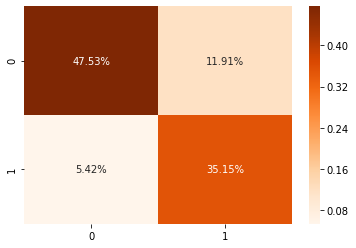

In [ ]:
import seaborn as sns
nb_heatmap = sns.heatmap(nb_cf_matrix/np.sum(nb_cf_matrix), annot=True, fmt='.2%', cmap='Oranges')

# SVM

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel

start = time.time()
clf.fit(X_train, y_train)
end = time.time()

print('Elapsed time: ',end - start)

y_pred_svm = clf.predict(X_test).ravel()

Elapsed time:  1431.300386428833


In [ ]:
accuracy_score(clf.predict(X_test),y_test)

0.8510695789236659

In [ ]:
clf_cf_matrix = confusion_matrix(clf.predict(X_test), y_test)
clf_cf_matrix

array([[9768, 1319],
       [1988, 9130]], dtype=int64)

In [ ]:
print(classification_report(clf.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86     11087
           1       0.87      0.82      0.85     11118

    accuracy                           0.85     22205
   macro avg       0.85      0.85      0.85     22205
weighted avg       0.85      0.85      0.85     22205



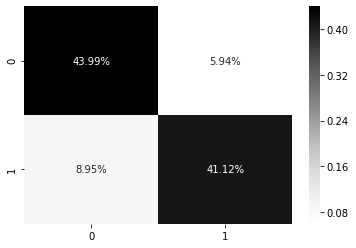

In [ ]:
s = sns.heatmap(clf_cf_matrix/np.sum(clf_cf_matrix), annot=True, fmt='.2%', cmap='Greys')

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier()

start = time.time()
dec.fit(X_train,y_train)
end = time.time()

print('Elapsed time: ',end - start)

Elapsed time:  135.8686466217041


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(dec.predict(X_test),y_test)

0.825039405539293

In [ ]:
from sklearn.metrics import confusion_matrix
dec_cf_matrix = confusion_matrix(dec.predict(X_test), y_test)
dec_cf_matrix

array([[9598, 1727],
       [2158, 8722]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(dec.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83     11325
           1       0.83      0.80      0.82     10880

    accuracy                           0.83     22205
   macro avg       0.83      0.82      0.82     22205
weighted avg       0.83      0.83      0.82     22205



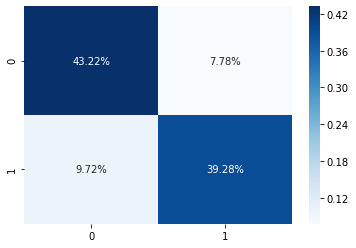

In [ ]:
dtree = sns.heatmap(dec_cf_matrix/np.sum(dec_cf_matrix), annot=True, fmt='.2%', cmap='Blues')

# Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression #import model
log = LogisticRegression() #Create instance

start = time.time()
log.fit(X_train,y_train)
end = time.time()

print('Elapsed time: ',end - start)

y_pred_log = log.predict(X_test).ravel()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Elapsed time:  0.7746419906616211


In [ ]:
accuracy_score(log.predict(X_test),y_test)

0.8502589506867823

In [ ]:
log_cf_matrix = confusion_matrix(log.predict(X_test), y_test)
log_cf_matrix

array([[9795, 1364],
       [1961, 9085]], dtype=int64)

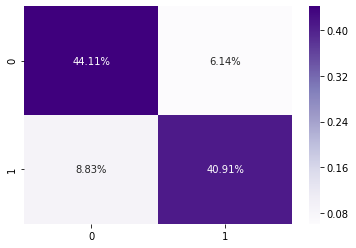

In [ ]:
lr = sns.heatmap(log_cf_matrix/np.sum(log_cf_matrix), annot=True, fmt='.2%', cmap='Purples')

In [ ]:
print(classification_report(log.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85     11159
           1       0.87      0.82      0.85     11046

    accuracy                           0.85     22205
   macro avg       0.85      0.85      0.85     22205
weighted avg       0.85      0.85      0.85     22205



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
start = time.time()
rf.fit(X_train,y_train)
end = time.time()

print('Elapsed time: ',end - start)

y_pred_rf = rf.predict(X_test).ravel()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Elapsed time:  105.85047006607056


In [ ]:
accuracy_score(rf.predict(X_test),y_test)

0.8343165953614051

In [ ]:
rf_cf_matrix = confusion_matrix(rf.predict(X_test), y_test)
rf_cf_matrix

array([[9757, 1680],
       [1999, 8769]], dtype=int64)

In [ ]:
print(classification_report(rf.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     11437
           1       0.84      0.81      0.83     10768

    accuracy                           0.83     22205
   macro avg       0.83      0.83      0.83     22205
weighted avg       0.83      0.83      0.83     22205



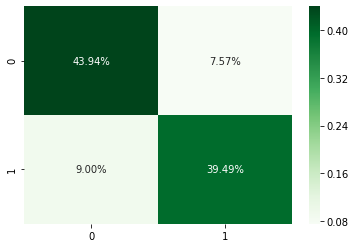

In [ ]:
forest = sns.heatmap(rf_cf_matrix/np.sum(rf_cf_matrix), annot=True, fmt='.2%', cmap='Greens')